<a href="https://colab.research.google.com/github/vladimiralencar/Alunos-UEPB-TopicosEspeciaisEmBancoDeDados/blob/master/deeplearning/ConvNets_MNIST_Acura%CC%81cia_99_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import all Necessary Libraries**

In [2]:
!nvidia-smi

Sun Dec  1 01:28:34 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, Lambda
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.layers.advanced_activations import PReLU

Using TensorFlow backend.


**Load Train and Test Data**

In [4]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype('float32')
print(X_train.shape)
print(X_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)


**Data Visualization**

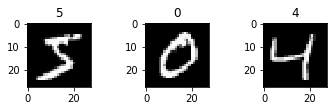

In [5]:
X_train_ = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(0, 3):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train_[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

**One-Hot Encoding**

In [0]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
num_classes=y_test.shape[1]

**Data Augmentation**

In [0]:
gen=image.ImageDataGenerator()
batches=gen.flow(X_train,y_train,batch_size=64)

**Normalization**

In [0]:
mean=np.mean(X_train)
std=np.std(X_train)

def standardize(x):
    return (x-mean)/std

**Model Definition**

In [0]:
def model():
    model=Sequential()
    model.add(Lambda(standardize,input_shape=(28,28,1)))
    model.add(Conv2D(64,(3,3),activation="linear"))
    model.add(PReLU())
    model.add(Conv2D(64,(3,3),activation="linear"))
    model.add(PReLU())
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(128,(3,3),activation="linear"))
    model.add(PReLU())
    model.add(Conv2D(128,(3,3),activation="linear"))
    model.add(PReLU())
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(256,(3,3),activation="linear"))
    model.add(PReLU())
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(512,activation="linear"))
    model.add(PReLU())
    model.add(Dense(10,activation="softmax"))
    
    model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
    model.fit_generator(generator=batches,steps_per_epoch=batches.n,epochs=3)
    return model

**Model Training**

In [10]:
%%time
model=model()















Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/3
60000/60000 [==============================] - 982s 16ms/step - loss: 0.0073 - acc: 0.9979
Epoch 2/3
60000/60000 [==============================] - 955s 16ms/step - loss: 0.0018 - acc: 0.9996
Epoch 3/3
60000/60000 [==============================] - 955s 16ms/step - loss: 0.0013 - acc: 0.9997
CPU times: user 54min 56s, sys: 5min 19s, total: 1h 16s
Wall time: 48min 17s


**Model Evaluation**

In [17]:
score=model.evaluate(X_test,y_test,verbose=0)
print("CNN Precision:%.2f%%" %(score[1]*100))
print("CNN Error:%.2f%%" %(100-score[1]*100))

CNN Precision:99.37%
CNN Error:0.63%
